In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime

from IPython.core.display import Image, display

plt.style.use('ggplot')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

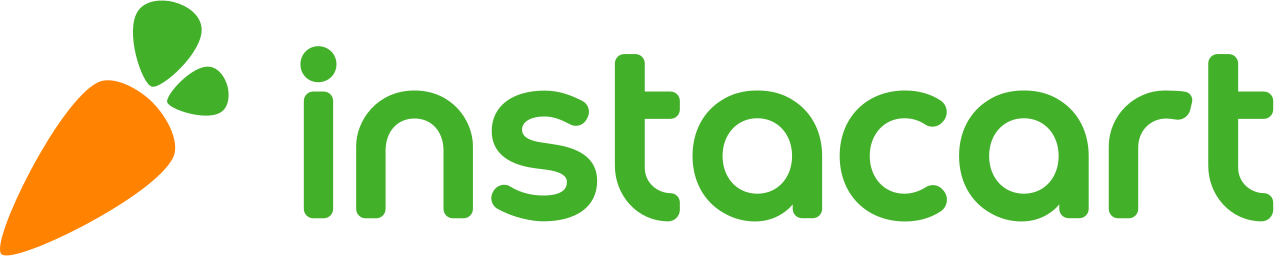

In [60]:
display(Image('https://upload.wikimedia.org/wikipedia/en/thumb/9/9f/Instacart_logo_and_wordmark.svg/1280px-Instacart_logo_and_wordmark.svg.png',
              width=400, unconfined=True))

* [Datasets](#Datasets)
    * [Data Dictionary](#Data-Dictionary)
    * [aisles.csv](#aisles.csv)
    * [departments.csv](#departments.csv)
    * [products.csv](#products.csv)
    * [order_products__prior.csv](#order_products__prior.csv)
    * [order_products__train.csv](#order_products__train.csv)
    * [orders.csv](#orders.csv)
* [Data Analysis](#Data-Analysis)
    * [Most Ordered Products](#Most-Ordered-Products)
        * [Most Ordered Products Per Order](#Most-Ordered-Products-Per-Order)
        * [Most Ordered Products (Plots)](#Most-Ordered-Products-(Plots))
    * [Recorded Orders](#Recorded-Orders)
        * [Recorded Orders by Products](#Recorded-Orders-by-Products)
    * [Orders Distributions](#Orders-Distributions)
        * [Orders Distributions (Week)](#Orders-Distributions-(Week))
        * [Orders Distributions (Hours)](#Orders-Distributions-(Hours))
    * [Days after the First Order](#Days-after-the-First-Order)
    * [Evaluation Sets](#Evaluation-Sets)
        * [Unique Customers in Each Evaluation Sets](#Unique-Customers-in-Each-Evaluation-Sets)
    * [Number of Orders Per Customer](#Number-of-Orders-Per-Customer)
    * [Products](#Products)
        * [The Number of Products in Each Department](#The-Number-of-Products-in-Each-Department)
        * [The Number of Products in Each Aisle from Each Department](#The-Number-of-Products-in-Each-Aisle-from-Each-Department)
    * [Departments’ Sales](#Departments’-Sales)
        * [Best Selling Departments](#Best-Selling-Departments)
        * [Best Selling Aisles in Each Departments](#Best-Selling-Aisles-in-Each-Departments)
        * [Best Selling Aisles over all Departments](#Best-Selling-Aisles-over-all-Departments)


## Datasets

You can download the data from [Kaggle.com](https://www.kaggle.com/c/instacart-market-basket-analysis/data) or  from [instacart.com](https://www.instacart.com/datasets/grocery-shopping-2017). The data includes the following files

* aisles.csv
* departments.csv
* order_products__prior.csv
* order_products__train.csv
* orders.csv
* products.csv
* sample_submission.csv

### Data Dictionary

The data dictionary is available [here](https://gist.github.com/jeremystan/c3b39d947d9b88b3ccff3147dbcf6c6b).

`orders` (3.4m rows, 206k users):
* `order_id`: order identifier
* `user_id`: customer identifier
* `eval_set`: which evaluation set this order belongs in (see `SET` described below)
* `order_number`: the order sequence number for this user (1 = first, n = nth)
* `order_dow`: the day of the week the order was placed on
* `order_hour_of_day`: the hour of the day the order was placed on
* `days_since_prior`: days since the last order, capped at 30 (with NAs for `order_number` = 1)

`products` (50k rows):
* `product_id`: product identifier
* `product_name`: name of the product
* `aisle_id`: foreign key
* `department_id`: foreign key

`aisles` (134 rows):
* `aisle_id`: aisle identifier
* `aisle`: the name of the aisle

`deptartments` (21 rows):
* `department_id`: department identifier
* `department`: the name of the department

`order_products__SET` (30m+ rows):
* `order_id`: foreign key
* `product_id`: foreign key
* `add_to_cart_order`: order in which each product was added to cart
* `reordered`: 1 if this product has been ordered by this user in the past, 0 otherwise

where `SET` is one of the four following evaluation sets (`eval_set` in `orders`):
* `"prior"`: orders prior to that users most recent order (~3.2m orders)
* `"train"`: training data supplied to participants (~131k orders)
* `"test"`: test data reserved for machine learning competitions (~75k orders)

### aisles.csv

In [2]:
aisles = pd.read_csv('Data/aisles.csv')
aisles.head().style.hide_index()

### departments.csv

In [3]:
departements = pd.read_csv('Data/departments.csv')
departements.head().style.hide_index()

### products.csv

In [4]:
products = pd.read_csv('Data/products.csv')
products.head().style.hide_index()

We can gonna create a dictionary that links a product id with its name.

In [5]:
product_mapping = products[['product_id','product_name']].set_index('product_id').to_dict()['product_name']

### order_products__prior.csv


In [6]:
order_products_prior = pd.read_csv('Data/order_products__prior.csv')
order_products_prior.head().style.hide_index()

### order_products__train.csv


In [7]:
order_products_train = pd.read_csv('Data/order_products__train.csv')
order_products_train.head().style.hide_index()

### orders.csv

In [8]:
orders = pd.read_csv('Data/orders.csv')
orders.head().style.hide_index()

## Data Analysis

### Most Ordered Products

First, let's look at the **top ten** popular products.

In [9]:
Top_number = 10
temp=pd.DataFrame(order_products_prior.product_id.value_counts())
Most_Ordered_Products=pd.DataFrame({'product_id':np.array(temp.index), 'count':temp.product_id})
del temp
Most_Ordered_Products=Most_Ordered_Products.reset_index(drop=True) 
Most_Ordered_Products.head()

product_id   count
0       24852  472565
1       13176  379450
2       21137  264683
3       21903  241921
4       47209  213584

Merging this dataframe with products dataframe.

In [10]:
Most_Ordered_Products=pd.merge(Most_Ordered_Products, products, on='product_id', how='right')
Most_Ordered_Products.head(Top_number)

product_id     count            product_name  aisle_id  department_id
0       24852  472565.0                  Banana        24              4
1       13176  379450.0  Bag of Organic Bananas        24              4
2       21137  264683.0    Organic Strawberries        24              4
3       21903  241921.0    Organic Baby Spinach       123              4
4       47209  213584.0    Organic Hass Avocado        24              4
5       47766  176815.0         Organic Avocado        24              4
6       47626  152657.0             Large Lemon        24              4
7       16797  142951.0            Strawberries        24              4
8       26209  140627.0                   Limes        24              4
9       27845  137905.0      Organic Whole Milk        84             16

### Most Ordered Products Per Order

In [11]:
temp = prod_id_col = order_products_prior.groupby('order_id').count()['product_id']
temp = pd.DataFrame(prod_id_col.value_counts())
Most_Ordered_Products_Per_Order=pd.DataFrame({'product_id':np.array(temp.index), 'count':temp.product_id})
del temp
Most_Ordered_Products_Per_Order=Most_Ordered_Products_Per_Order.reset_index(drop=True) 
Most_Ordered_Products_Per_Order.head()

product_id   count
0           5  228330
1           6  227675
2           4  222081
3           7  220006
4           3  207027

Merging this dataframe with products dataframe.

In [12]:
Most_Ordered_Products_Per_Order = pd.merge(Most_Ordered_Products_Per_Order, products, on='product_id', how='right')
Most_Ordered_Products_Per_Order.head(10)

product_id     count                                       product_name  \
0           5  228330.0                          Green Chile Anytime Sauce   
1           6  227675.0                                       Dry Nose Oil   
2           4  222081.0  Smart Ones Classic Favorites Mini Rigatoni Wit...   
3           7  220006.0                     Pure Coconut Water With Orange   
4           3  207027.0               Robust Golden Unsweetened Oolong Tea   
5           8  203374.0                  Cut Russet Potatoes Steam N' Mash   
6           2  186993.0                                   All-Seasons Salt   
7           9  184347.0                  Light Strawberry Blueberry Yogurt   
8          10  165550.0     Sparkling Orange Juice & Prickly Pear Beverage   
9           1  156748.0                         Chocolate Sandwich Cookies   

   aisle_id  department_id  
0         5             13  
1        11             11  
2        38              1  
3        98              7  
4        94              7  
5       116              1  
6       104             13  
7       120             16  
8       115              7  
9        61             19

### Most Ordered Products (Plots)

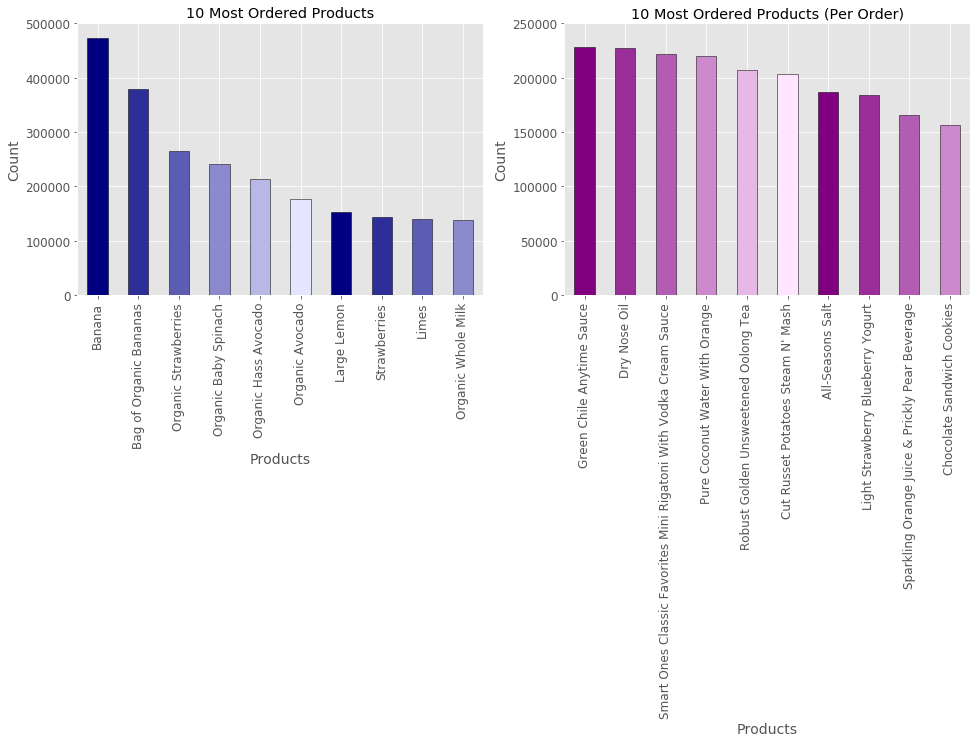

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5), sharex=False)
# Left Plot
_ = Most_Ordered_Products.head(Top_number).plot.bar(x='product_name', y='count', rot=90, legend=False, ax=ax[0],
                                                    color=sns.light_palette("navy", reverse=True), edgecolor="k")
_ = ax[0].set_title('%s Most Ordered Products' % Top_number)
_ = ax[0].set_ylim([0, 5e5])
_ = ax[0].set_xlabel('Products')
_ = ax[0].set_ylabel('Count')

# Right Plot
_ = Most_Ordered_Products_Per_Order.head(Top_number).plot.bar(x='product_name', y='count', rot=90, legend=False, ax=ax[1],
                                                              color=sns.light_palette("purple", reverse=True), edgecolor="k")
_ = ax[1].set_title('%s Most Ordered Products (Per Order)' % Top_number)
_ = ax[1].set_ylim([0, 2.5e5])
_ = ax[1].set_xlabel('Products')
_ = ax[1].set_ylabel('Count')

From the left plot, we can see that Bananas and Organic Bananas are the most popular items. Moreover, it can be seen from the right-hand side plot that Green chile Anytime Sauce and Dry Nose Oil are the most popular items per order.

### Recorded Orders

In [21]:
Recorded_Orders=pd.DataFrame(order_products_prior.reordered.value_counts())
Recorded_Orders.rename(index={1:'Yes', 0:'No'}, inplace=True)
Recorded_Orders.T

Yes        No
reordered  19126536  13307953

### Recorded Orders by Products 

In [22]:
Recorded_Orders_By_products = order_products_prior.groupby('product_id').agg({'order_id':'count',
                                                                              'reordered':"mean"})
Recorded_Orders_By_products = pd.merge(Recorded_Orders_By_products, products,right_on='product_id', left_index=True)
Recorded_Orders_By_products = Recorded_Orders_By_products.sort_values('reordered', ascending=False)
Recorded_Orders_By_products = Recorded_Orders_By_products.rename(columns={'reordered':'reordered_average'})
Recorded_Orders_By_products.head(Top_number)

order_id  reordered_average  product_id  \
6432         68           0.941176        6433   
2074         87           0.931034        2075   
43552        13           0.923077       43553   
27739       101           0.920792       27740   
14608        35           0.914286       14609   
13874        45           0.911111       13875   
39991        22           0.909091       39992   
5867         30           0.900000        5868   
31417        60           0.900000       31418   
35603       100           0.900000       35604   

                                   product_name  aisle_id  department_id  
6432                        Raw Veggie Wrappers        13             20  
2074   Serenity Ultimate Extrema Overnight Pads       126             11  
43552                       Orange Energy Shots        64              7  
27739                        Chocolate Love Bar        45             19  
14608                 Soy Powder Infant Formula        92             18  
13874          Simply Sleep Nighttime Sleep Aid         6              2  
39991                 Energy Shot, Grape Flavor        64              7  
5867    Russian River Valley Reserve Pinot Noir        28              5  
31417                            Sparking Water       115              7  
35603                           Maca Buttercups        45             19

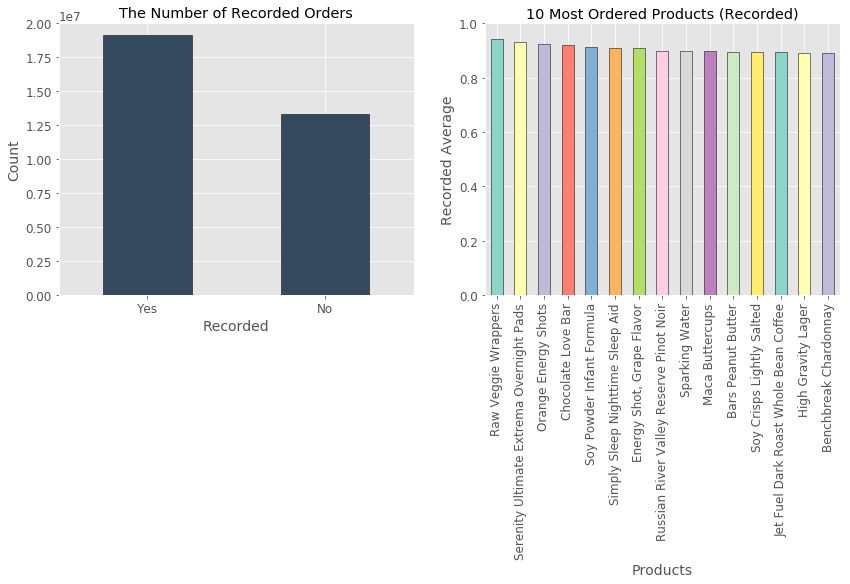

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5), sharex=False)
# Left Plot
_ = Recorded_Orders.head(Top_number).plot.bar(rot=0, legend=False, ax=ax[0],
                                              color='#34495e', edgecolor="k")
_ = ax[0].set_title('The Number of Recorded Orders')
_ = ax[0].set_ylim([0, 2e7])
_ = ax[0].set_xlabel('Recorded')
_ = ax[0].set_ylabel('Count')

# Right Plot
_ = Recorded_Orders_By_products.head(15).plot.bar(x='product_name', y='reordered_average', rot=90, legend=False,ax=ax[1],
                                                  color=sns.color_palette('Set3'), edgecolor="k")
_ = ax[1].set_title('%s Most Ordered Products (Recorded)' % Top_number)
_ = ax[1].set_ylim([0, 1])
_ = ax[1].set_xlabel('Products')
_ = ax[1].set_ylabel('Recorded Average')

It seems that the majority of orders are recorded; however, non-recorded ones are also considerable.

## Orders Distributions 

### Orders Distributions (Week)

In [29]:
Orders_Distributions_Week=pd.DataFrame(orders.order_dow.value_counts().sort_index())
Orders_Distributions_Week.index=calendar.day_name[0:7]
Orders_Distributions_Week=Orders_Distributions_Week.rename(columns={'order_dow':'count'})
Orders_Distributions_Week.T

Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
count  600905   587478     467260    436972  426339    453368  448761

### Orders Distributions (Hours)

In [30]:
Orders_Distributions_Hours=pd.DataFrame(orders.order_hour_of_day.value_counts().sort_index())
Orders_Distributions_Hours=Orders_Distributions_Hours.rename(columns={'order_dow':'count'})
Orders_Distributions_Hours.T

0      1     2     3     4     5      6      7       8   \
order_hour_of_day  22758  12398  7539  5474  5527  9569  30529  91868  178201   

                       9   ...      14      15      16      17      18  \
order_hour_of_day  257812  ...  283042  283639  272553  228795  182912   

                       19      20     21     22     23  
order_hour_of_day  140569  104292  78109  61468  40043  

[1 rows x 24 columns]

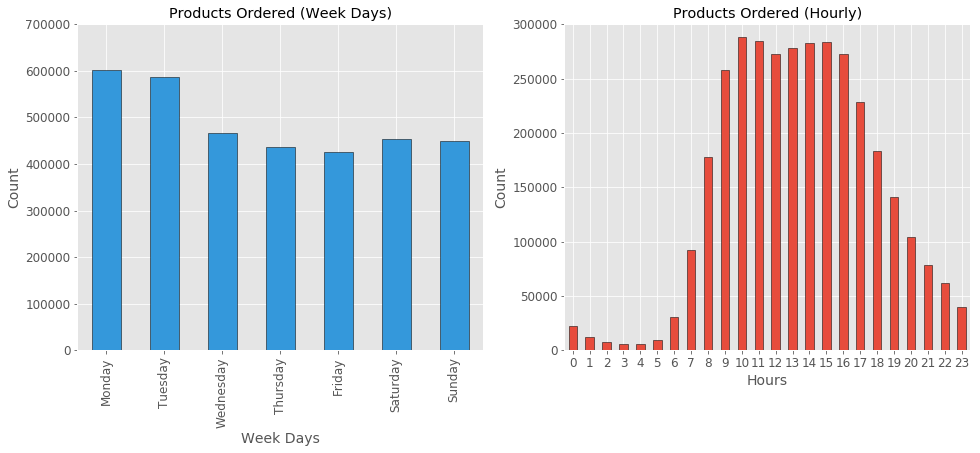

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharex=False)
# Left Plot
_ = Orders_Distributions_Week.plot.bar(rot=90, legend=False, ax=ax[0], color='#3498db', edgecolor="k")
_ = ax[0].set_title('Products Ordered (Week Days)')
_ = ax[0].set_ylim([0, 7e5])
_ = ax[0].set_xlabel('Week Days')
_ = ax[0].set_ylabel('Count')

# Right Plot
_ = Orders_Distributions_Hours.plot.bar(rot=0, legend=False, ax=ax[1], color="#e74c3c", edgecolor="k")
_ = ax[1].set_title('Products Ordered (Hourly)')
_ = ax[1].set_ylim([0, 3e5])
_ = ax[1].set_xlabel('Hours')
_ = ax[1].set_ylabel('Count')

Most orders take place on Mondays and Tuesdays. Besides, between 9:00 AM and 5:00 PM, most orders take place daily.

In [32]:
Orders_Distributions_Total = orders.pivot_table(index='order_dow', columns='order_hour_of_day', values='order_id',
                                                aggfunc=lambda x:round(len(x)*0.001,2)).fillna(0)
Orders_Distributions_Total.index=calendar.day_name[0:7]
Orders_Distributions_Total

order_hour_of_day    0     1     2     3     4     5     6      7      8   \
Monday             3.94  2.40  1.41  0.96  0.81  1.17  3.33  12.41  28.11   
Tuesday            3.67  1.83  1.10  0.75  0.81  1.61  5.37  16.57  34.12   
Wednesday          3.06  1.57  0.94  0.72  0.74  1.40  4.76  13.25  24.64   
Thursday           2.95  1.50  0.95  0.65  0.72  1.35  4.56  12.40  22.55   
Friday             2.64  1.51  0.90  0.69  0.73  1.33  4.40  12.49  21.81   
Saturday           3.19  1.67  1.02  0.84  0.91  1.57  4.87  13.43  24.02   
Sunday             3.31  1.92  1.21  0.86  0.80  1.14  3.24  11.32  22.96   

order_hour_of_day     9   ...     14     15     16     17     18     19  \
Monday             40.80  ...  54.55  53.95  49.46  39.75  29.57  22.65   
Tuesday            51.91  ...  46.76  46.40  44.76  36.79  28.98  22.14   
Wednesday          36.31  ...  37.17  37.47  37.54  32.15  26.47  20.08   
Thursday           32.31  ...  34.77  35.99  35.27  30.37  25.00  19.25   
Friday             31.41  ...  33.62  34.22  34.09  29.38  24.43  19.35   
Saturday           34.23  ...  37.41  37.51  35.86  29.96  24.31  18.74   
Sunday             30.84  ...  38.75  38.09  35.56  30.40  24.16  18.35   

order_hour_of_day     20     21     22    23  
Monday             18.28  14.42  11.25  6.89  
Tuesday            16.28  11.94   8.99  5.62  
Wednesday          15.04  10.65   8.15  5.36  
Thursday           13.79  10.28   8.24  5.18  
Friday             14.19  10.80   8.81  5.65  
Saturday           13.32   9.52   7.50  5.26  
Sunday             13.39  10.50   8.53  6.09  

[7 rows x 24 columns]

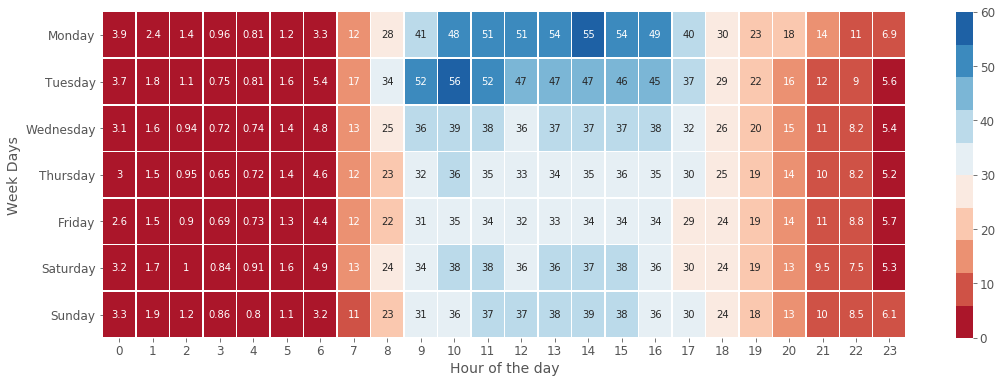

In [33]:
fig, ax = plt.subplots(figsize=(18,6))
fig = sns.heatmap(Orders_Distributions_Total, annot=True, cmap =sns.color_palette("RdBu", n_colors=10),
                  linewidths=.5, ax=ax, vmin=0, vmax=60) 
_ = ax.set_ylabel('Week Days')
_ = ax.set_xlabel('Hour of the day')

Between 9:00 AM and 5:00 PM, most orders take place on Mondays and Tuesdays.

### Days after the First Order

In [34]:
Days_since_prior_order_summary = pd.DataFrame(orders.days_since_prior_order.value_counts().sort_index())
Days_since_prior_order_summary = Days_since_prior_order_summary.rename(columns={'days_since_prior_order':'count'})
Days_since_prior_order_summary.index = np.array(Days_since_prior_order_summary.index,dtype=int)

In [35]:
Days_since_prior_order_summary.T

0       1       2       3       4       5       6       7       8   \
count  67755  145247  193206  217005  221696  214503  240013  320608  181717   

           9   ...     21     22     23     24     25     26     27     28  \
count  118188  ...  45470  32012  23885  20712  19234  19016  22013  26777   

          29      30  
count  19191  369323  

[1 rows x 31 columns]

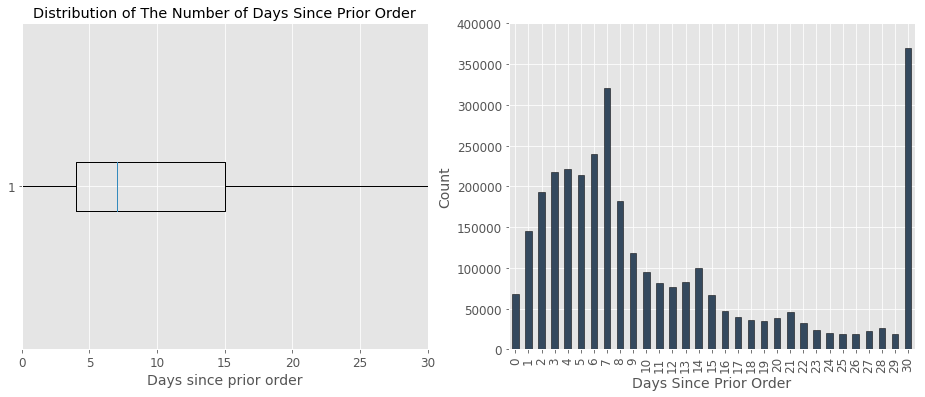

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharex=False)

_ = ax[0].boxplot(orders.days_since_prior_order.dropna(), 0, 'rs', 0)
_ = ax[0].set_xlabel('Days since prior order')
_ = ax[0].set_title('Distribution of The Number of Days Since Prior Order')
_ = ax[0].set_xlim([0, 30])

_ = Days_since_prior_order_summary.plot.bar(rot=90, legend=False, ax=ax[1], color='#34495e', edgecolor="k")
_ = ax[1].set_xlabel('Days Since Prior Order')
_ = ax[1].set_ylabel('Count')
_ = ax[1].set_ylim([0, 4e5])

Usually, customers order from 5 days to 15 days after the prior order. The majority of orders take place after a week and a month after the prior order.

## Evaluation Sets

In [37]:
Evaluation_Sets = orders.groupby('eval_set')['order_id'].aggregate({'total_orders': 'count'}).reset_index()
Evaluation_Sets['ratio'] = Evaluation_Sets['total_orders'].apply(lambda x: x /Evaluation_Sets['total_orders'].sum())
Evaluation_Sets.style.hide_index()

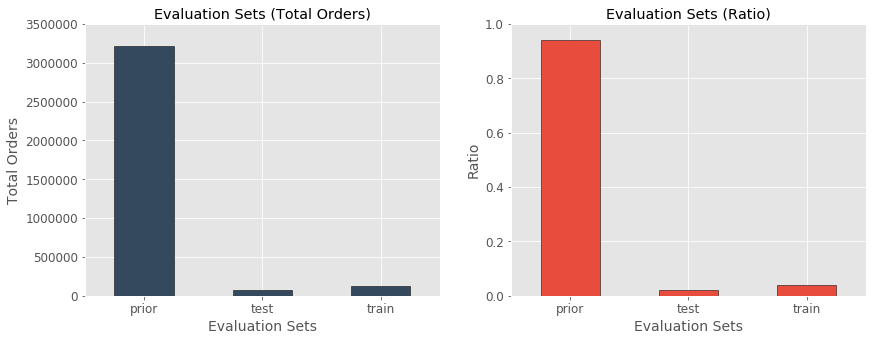

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5), sharex=False)
# Left Plot
_ = Evaluation_Sets.plot.bar(x='eval_set', y='total_orders', rot=0, legend=False, ax=ax[0],
                                              color='#34495e', edgecolor="k")
_ = ax[0].set_title('Evaluation Sets (Total Orders)')
_ = ax[0].set_ylim([0, 3.5e6])
_ = ax[0].set_xlabel('Evaluation Sets')
_ = ax[0].set_ylabel('Total Orders')

# Right Plot
_ = Evaluation_Sets.plot.bar(x='eval_set', y='ratio', rot=0, legend=False,
                                                          ax=ax[1], color='#e74c3c', edgecolor="k")
_ = ax[1].set_title('Evaluation Sets (Ratio)')
_ = ax[1].set_ylim([0, 1])
_ = ax[1].set_xlabel('Evaluation Sets')
_ = ax[1].set_ylabel('Ratio')

_ = plt.tight_layout

### Unique Customers in Each Evaluation Sets

In [39]:
Evaluation_Sets_unique = pd.DataFrame(orders.groupby("eval_set")["user_id"].apply(lambda x: len(x.unique())))
Evaluation_Sets_unique=Evaluation_Sets_unique.reset_index()
Evaluation_Sets_unique=Evaluation_Sets_unique.rename(columns={'user_id':'unique_customers_number'})
Evaluation_Sets_unique.style.hide_index()

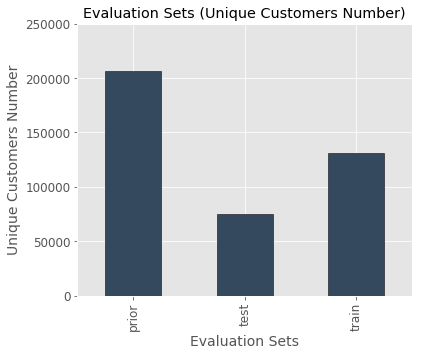

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 5), sharex=False)

_ = Evaluation_Sets_unique.plot.bar(x='eval_set', y='unique_customers_number', rot=90, legend=False,
                                                        ax=ax, color='#34495e', edgecolor="k")
_ = ax.set_title('Evaluation Sets (Unique Customers Number)')
_ = ax.set_ylim([0, 2.5e5])
_ = ax.set_xlabel('Evaluation Sets')
_ = ax.set_ylabel('Unique Customers Number')

_ = plt.tight_layout

We can see that most customers are from the prior set.

## Number of Orders Per Customer

In [41]:
Customer_Orders = orders.groupby('user_id')['order_id'].apply(lambda x: len(x.unique())).reset_index()
Customer_Orders = Customer_Orders.groupby('order_id').aggregate("count")
Customer_Orders = Customer_Orders.reset_index(drop=False) 
Customer_Orders = Customer_Orders.rename(columns={'order_id':'number_of_orders'})
Customer_Orders = Customer_Orders.reindex(columns=sorted(Customer_Orders.columns, reverse=True))
Customer_Orders.sort_values(by=['number_of_orders'],ascending=False).head().style.hide_index()

## Products

In [42]:
Products_Detailed  = pd.merge(left =pd.merge(left=products, right= departements, how='left'), right=aisles, how='left')
Products_Detailed.head().style.hide_index()

### The Number of Products in Each Department

In [43]:
Products_by_Department = Products_Detailed.groupby('department')['product_id'].aggregate({'total_products': 'count'}).reset_index()
Products_by_Department['ratio'] = Products_by_Department['total_products'].apply(lambda x: x /Products_by_Department['total_products'].sum())
Products_by_Department.sort_values(by='total_products', ascending=False, inplace=True)
Products_by_Department.head().style.hide_index()

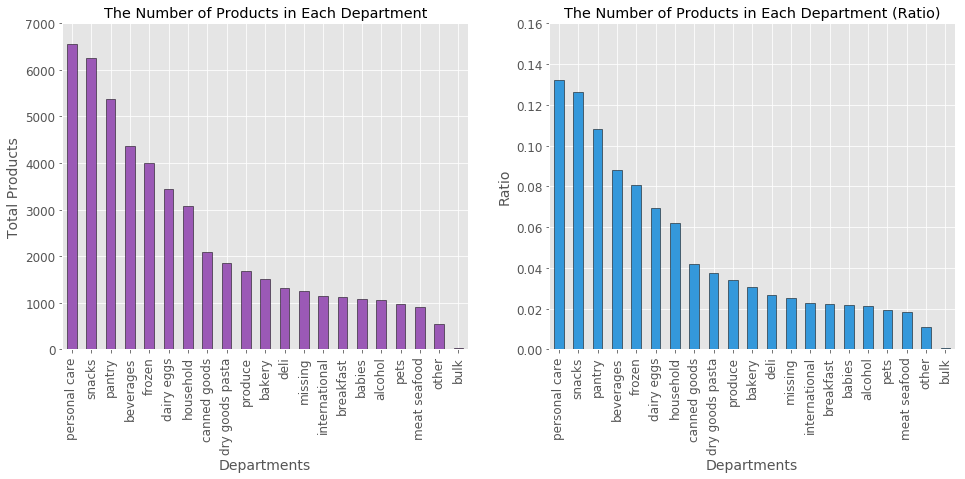

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharex=False)
# Left Plot
_ = Products_by_Department.plot.bar(x='department', y='total_products', rot=90, legend=False,
                                                          ax=ax[0], color='#9b59b6', edgecolor="k")
_ = ax[0].set_title('The Number of Products in Each Department')
_ = ax[0].set_ylim([0, 7e3])
_ = ax[0].set_xlabel('Departments')
_ = ax[0].set_ylabel('Total Products')

# Right Plot
_ = Products_by_Department.plot.bar(x='department', y='ratio', rot=90, legend=False,
                                                          ax=ax[1], color='#3498db', edgecolor="k")
_ = ax[1].set_title('The Number of Products in Each Department (Ratio)')
_ = ax[1].set_ylim([0, 0.16])
_ = ax[1].set_xlabel('Departments')
_ = ax[1].set_ylabel('Ratio')

_ = plt.tight_layout

It can be seen that **Personal Care** and **Snacks** are the best seller departments.

### The Number of Products in Each Aisle from Each Department

In [45]:
Products_by_Aisle = Products_Detailed.groupby(["department", "aisle"])["product_id"].aggregate({'total_products': 'count'}).reset_index()
Products_by_Aisle['ratio'] = Products_by_Aisle["total_products"].apply(lambda x: x /Products_by_Aisle['total_products'].sum())
Products_by_Aisle.sort_values(by='total_products', ascending=False, inplace=True)
Products_by_Aisle.head().style.hide_index()

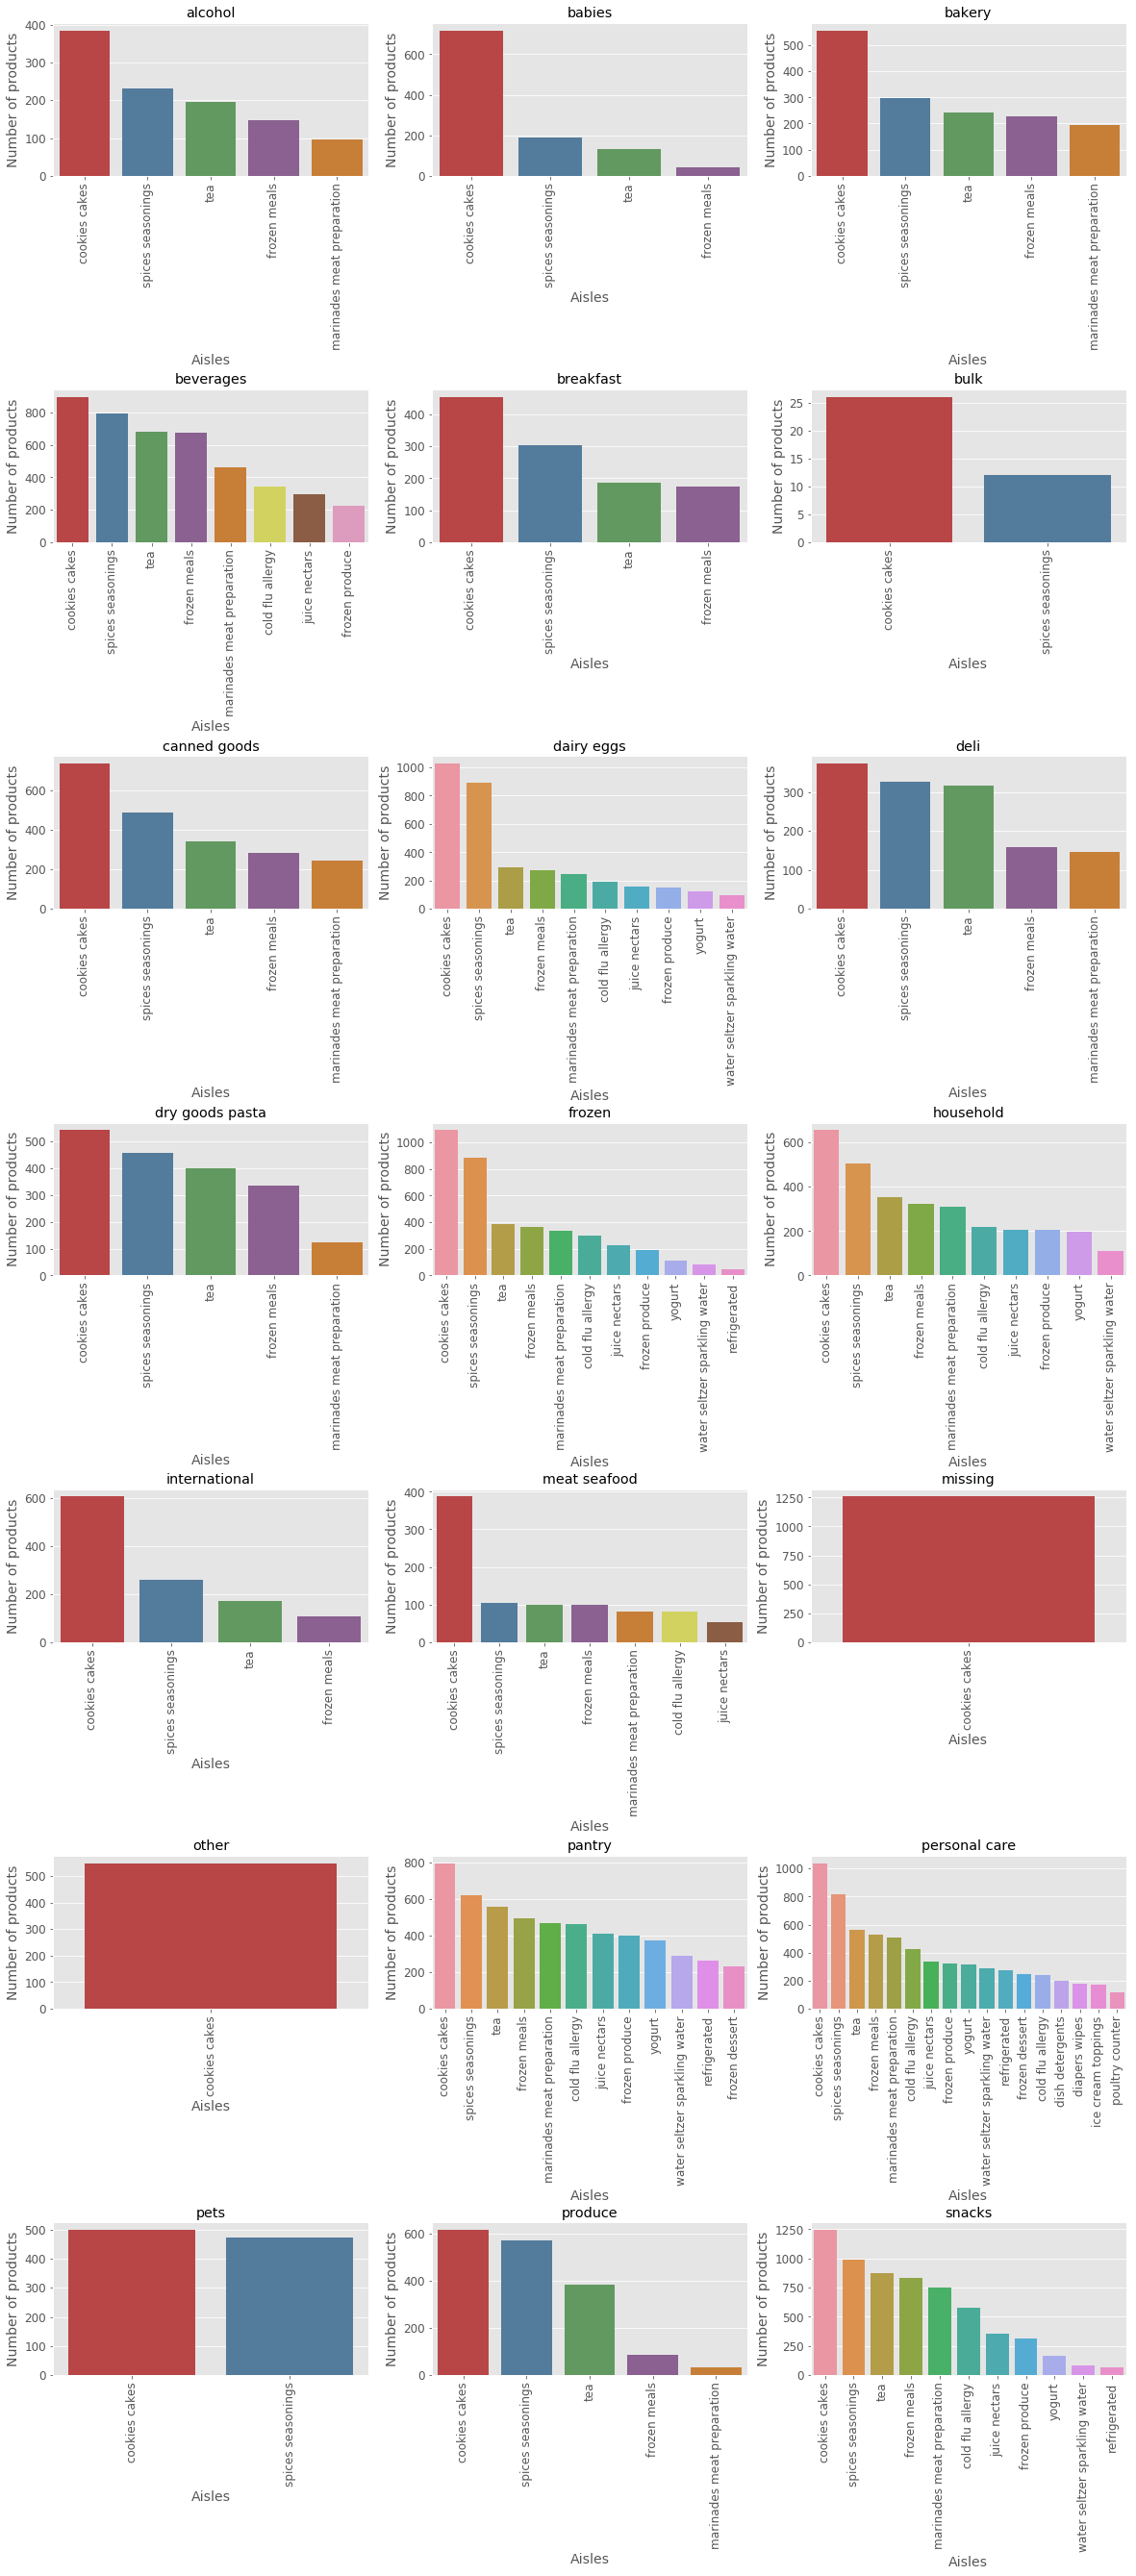

In [46]:
sns.set_palette("Set1", 8, .75)
fig, ax = plt.subplots(nrows=7, ncols=3, figsize=(20,45), gridspec_kw =  dict(hspace=1.4))
for (aisle, Products_by_Aisle), ax in zip(Products_by_Aisle.groupby(['department']), ax.flatten()):
    f = sns.barplot(Products_by_Aisle.aisle, Products_by_Aisle.total_products , ax=ax)
    ax.set(xlabel = 'Aisles', ylabel='Number of products')
    f.set_xticklabels(labels = Products_Detailed.aisle,rotation=90)
    ax.set_title(aisle)

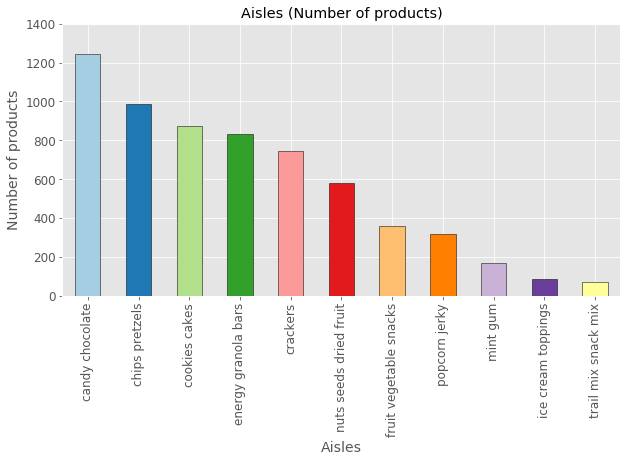

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5), sharex=False)
_ = Products_by_Aisle.head(30).plot.bar(x='aisle', y='total_products', rot=90, legend=False,ax=ax,
                                        color=sns.color_palette("Paired"), edgecolor="k")
_ = ax.set_title('Aisles (Number of products)')
_ = ax.set_ylim([0, 1.4e3])
_ = ax.set_xlabel('Aisles')
_ = ax.set_ylabel('Number of products')

**Candy chocolate**, **chips pretzels**, and **cookies cakes** are the best selling products.

## Departments’ Sales

In [48]:
Orders_Detailed = orders[['user_id', 'order_id']].merge(order_products_train[['order_id', 'product_id']],
                                                             how='inner', left_on='order_id', right_on='order_id')
Orders_Detailed = Orders_Detailed.merge(Products_Detailed, how='inner', left_on='product_id',
                                                  right_on='product_id')
Orders_Detailed.head().style.hide_index()

### Best Selling Departments

In [49]:
Orders_by_Department = Orders_Detailed.groupby('department')['order_id'].aggregate({'total_orders': 'count'}).reset_index()
Orders_by_Department['Ratio'] = Orders_by_Department['total_orders'].apply(lambda x: x /Orders_by_Department['total_orders'].sum())
Orders_by_Department.sort_values(by='total_orders', ascending=False, inplace=True)
Orders_by_Department.head().style.hide_index()

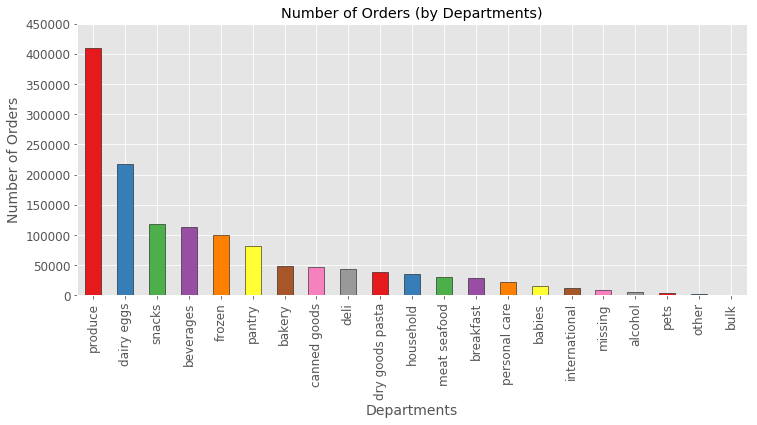

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5), sharex=False)
_ = Orders_by_Department.head(30).plot.bar(x='department', y='total_orders', rot=90, legend=False,ax=ax,
                                           color=sns.color_palette("Set1"), edgecolor="k")
_ = ax.set_title('Number of Orders (by Departments)')
_ = ax.set_ylim([0, 4.5e5])
_ = ax.set_xlabel('Departments')
_ = ax.set_ylabel('Number of Orders')

### Best Selling Aisles in Each Departments

In [51]:
Orders_by_Aisles = Orders_Detailed.groupby(['department',
                                            'aisle'])['order_id'].aggregate({'total_orders': 'count'}).reset_index()
Orders_by_Aisles.sort_values(by='total_orders', ascending=False, inplace=True)
Orders_by_Aisles.head().style.hide_index()

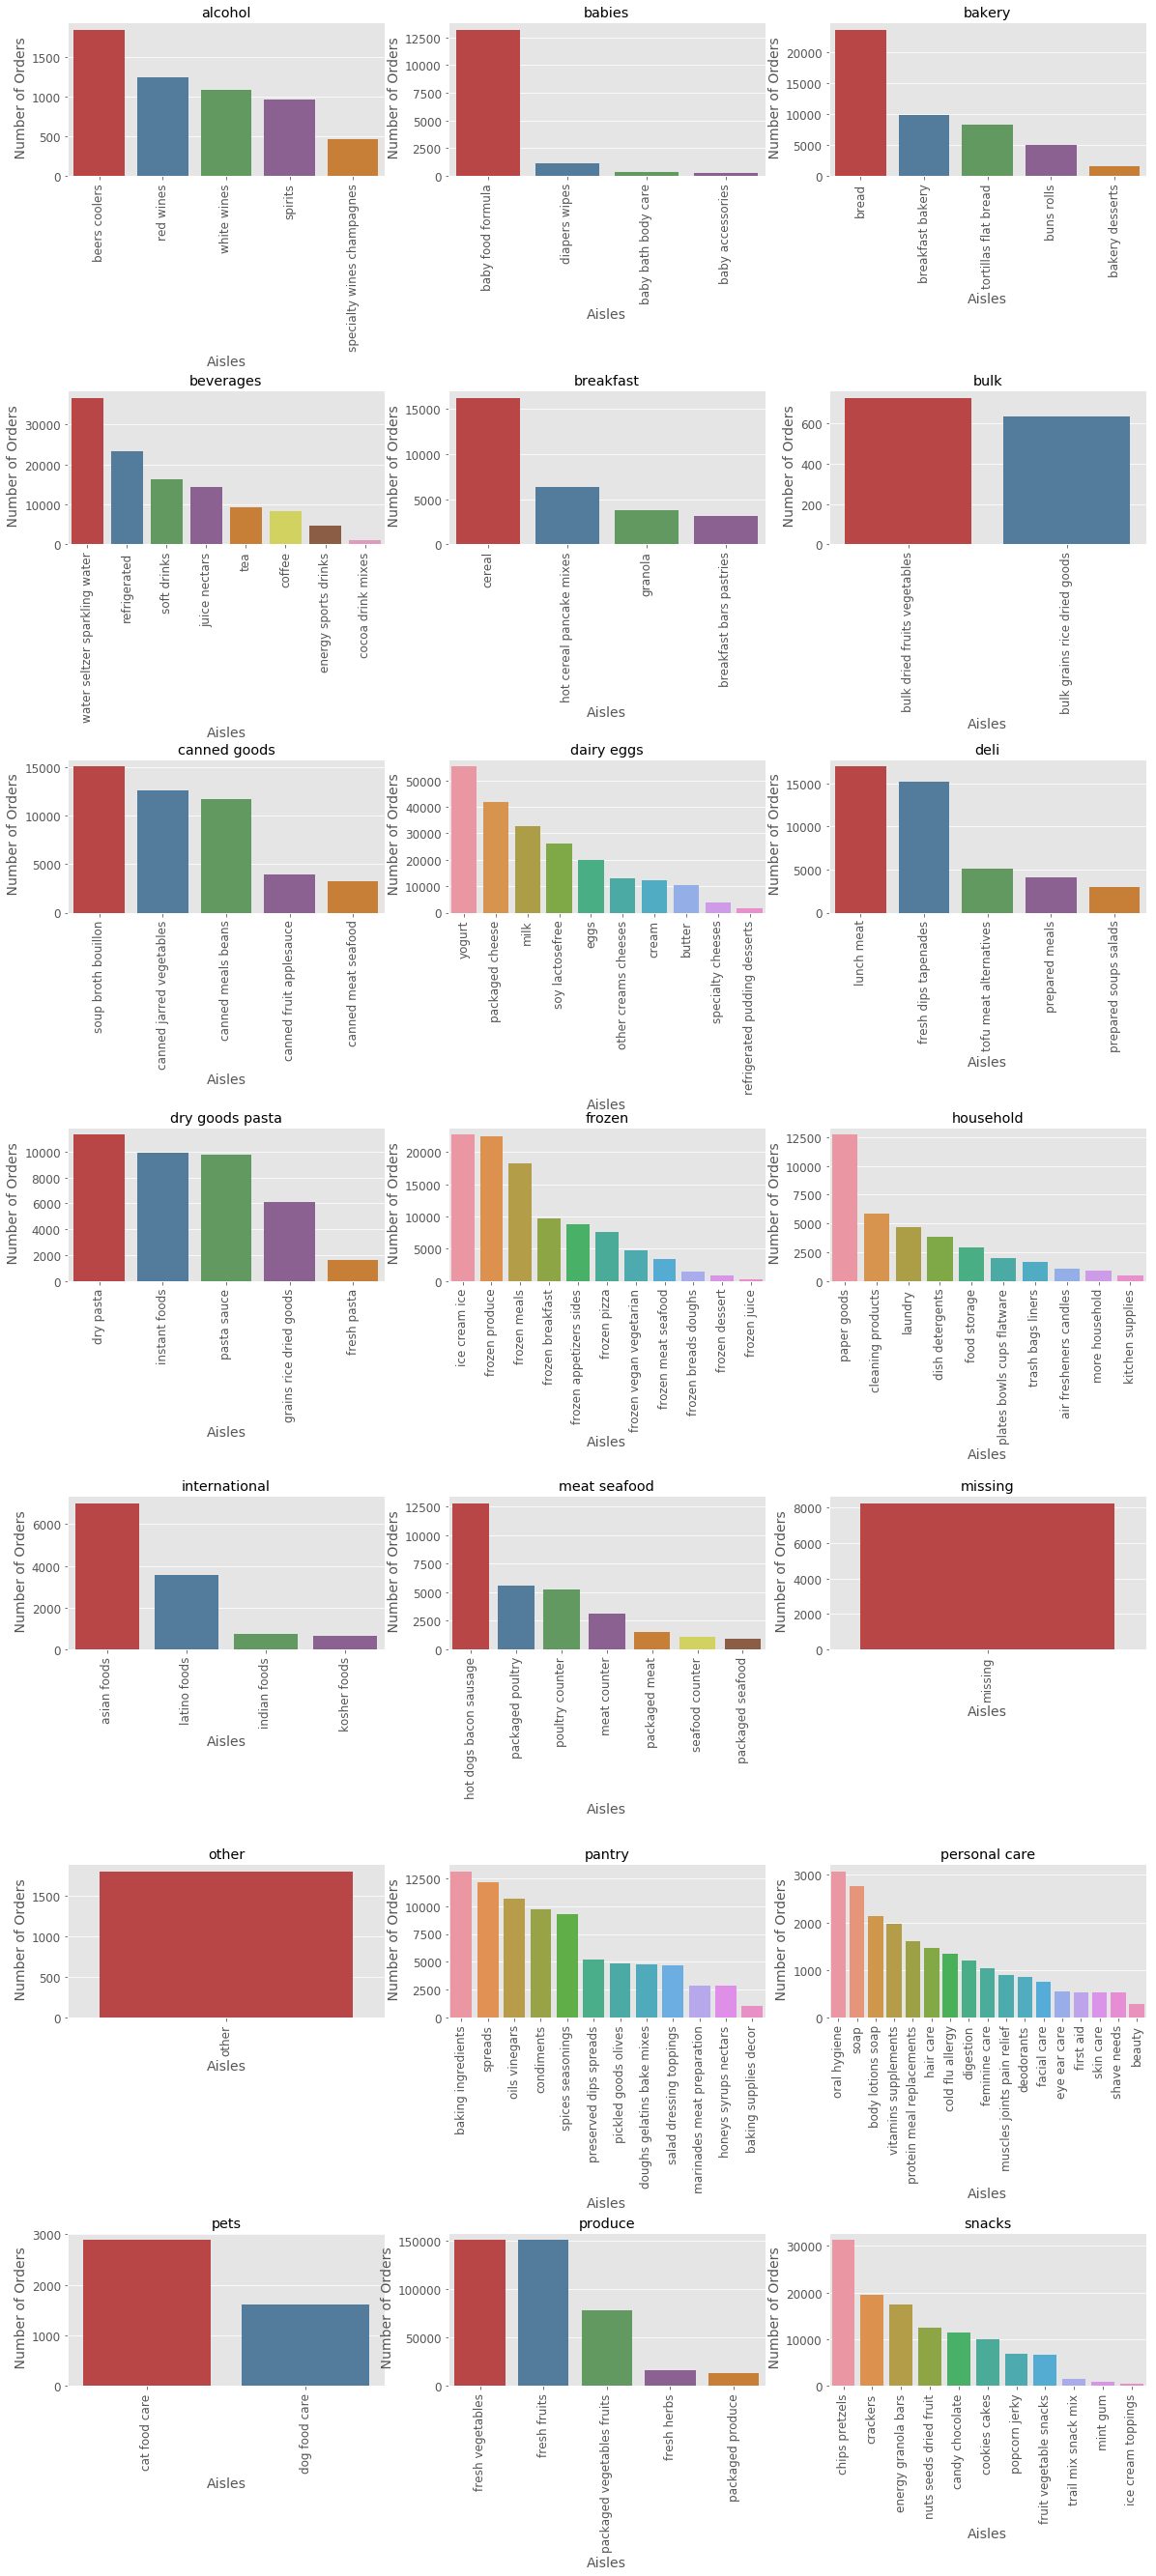

In [52]:
fig, axes = plt.subplots(7,3, figsize=(20,45), gridspec_kw =  dict(hspace=1.4))
for (aisle, Orders_by_Aisles), ax in zip(Orders_by_Aisles.groupby(['department']), axes.flatten()):
    g = sns.barplot(Orders_by_Aisles.aisle, Orders_by_Aisles.total_orders , ax=ax)
    ax.set(xlabel = 'Aisles', ylabel=' Number of Orders')
    g.set_xticklabels(labels = Orders_by_Aisles.aisle,rotation=90, fontsize=12)
    ax.set_title(aisle)

### Best Selling Aisles over all Departments

In [53]:
Orders_by_Aisles_total = Orders_Detailed.groupby('aisle')['order_id'].aggregate({'total_orders': 'count'}).reset_index()
Orders_by_Aisles_total['ratio'] = Orders_by_Aisles_total['total_orders'].apply(lambda x: x /Orders_by_Aisles_total['total_orders'].sum())
Orders_by_Aisles_total.sort_values(by='total_orders', ascending=False, inplace=True )
Orders_by_Aisles_total.head().style.hide_index()

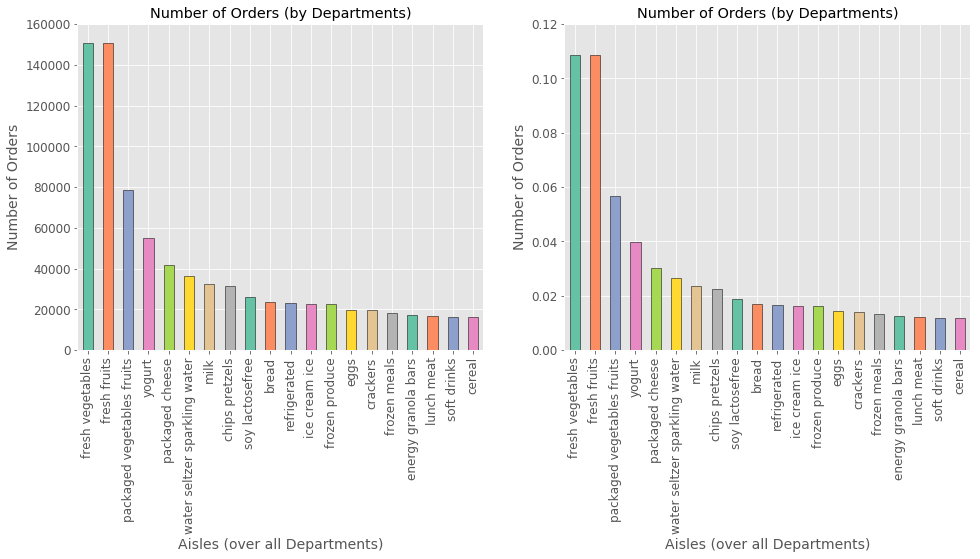

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharex=False)
# Left Plot
_ = Orders_by_Aisles_total.head(20).plot.bar(x='aisle', y='total_orders', rot=90, legend=False,ax=ax[0],
                                             color=sns.color_palette("Set2"), edgecolor="k")
_ = ax[0].set_title('Number of Orders (by Departments)')
_ = ax[0].set_ylim([0, 1.6e5])
_ = ax[0].set_xlabel('Aisles (over all Departments)')
_ = ax[0].set_ylabel('Number of Orders')
# Right Plot
_ = Orders_by_Aisles_total.head(20).plot.bar(x='aisle', y='ratio', rot=90, legend=False,ax=ax[1],
                                             color=sns.color_palette("Set2"), edgecolor="k")
_ = ax[1].set_title('Number of Orders (by Departments)')
_ = ax[1].set_ylim([0, 0.12])
_ = ax[1].set_xlabel('Aisles (over all Departments)')
_ = ax[1].set_ylabel('Number of Orders')

_ = plt.tight_layout